In [1]:
from MERFISH_Objects.Analyze import *
""" Making the daemon paths"""
""" be careful you dont delete other peoples files"""
cword_config = 'merfish_config_TBI_Hippocampus' #CHANGE
metadata_path = '/bigstore/Images2022/gaby/TBI/sham1_3_2022Jan03/' #CHANGE
merfish_config = importlib.import_module(cword_config)
daemon_path = merfish_config.parameters['daemon_path']
utilities_path = merfish_config.parameters['utilities_path']
fishdata_path = os.path.join(metadata_path,merfish_config.parameters['fishdata'])
import shutil
if not os.path.exists(daemon_path):
    os.mkdir(daemon_path)
else:
    shutil.rmtree(daemon_path)
    os.mkdir(daemon_path)
# if not os.path.exists(utilities_path):
#     os.mkdir(utilities_path)
# else:
#     shutil.rmtree(utilities_path)
#     os.mkdir(utilities_path) 
dtypes = ['dataset','position','hybe','registration','stack','image','deconvolution','segmentation','classification']
for dtype in dtypes:
    dtype_daemon_path = os.path.join(daemon_path,dtype)
    if not os.path.exists(dtype_daemon_path):
        os.mkdir(dtype_daemon_path)
if not os.path.exists(fishdata_path):
    os.mkdir(fishdata_path)

In [ ]:
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Analyze.py /bigstore/Images2022/Gaby/TBI/TBI_3_1_2022Jan15 merfish_config_TBI_Hippocampus

In [ ]:
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Progress.py /bigstore/Images2021/Zach/TBI/TBI-1-1_2021Oct20/ merfish_config_TBI_Hippocampus

In [ ]:
""" RUN ON HYBE """
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py dataset -i 60 -n 1

In [ ]:
""" RUN ON HYBE """
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py position -i 60 -n 1

In [ ]:
""" RUN ON HYBE """
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py hybe -i 60 -n 1

In [ ]:
""" RUN ON HYBE """
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py stack -i 60 -n 1

In [ ]:
""" RUN ON ALL (Do First) """
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py registration -i 60 -n 20

In [ ]:
""" RUN ON ALL (Do First) """
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py segmentation -i 60 -n 10

In [ ]:
""" Stop Registration and Segmentation Before Starting Image """

In [ ]:
""" RUN ON ALL (Do After Registration/Segmentation Are Done) """
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py image -i 60 -n 30

In [ ]:
""" Stop Image before Classify """

In [ ]:
""" RUN ON HYBE (After Image is done)"""
conda activate merfish_3.9;python -W ignore /home/zach/PythonRepos/PySpots/MERFISH_Objects/Daemon_wrapper.py classification -i 60 -n 20

In [1]:
from MERFISH_Objects.Analyze import *

/home/zach/miniconda3/envs/pyspots-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zach/miniconda3/envs/pyspots-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zach/miniconda3/envs/pyspots-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zach/miniconda3/envs/pyspots

In [ ]:
def check_status(fishdata_path):
    out = {}
    dtypes = ['dataset','pos','hybe','reg','stk','img','decon']
    outcomes = ['passed','failed','started']
    for dtype in dtypes:
        out[dtype] = {}
        for outcome in outcomes:
            out[dtype][outcome] = []
    for fname in os.listdir(fishdata_path):
        if 'flag' in fname:
            try:
                t = pd.read_csv(os.path.join(fishdata_path,fname)).columns[0]
                dtype = find_dtype(fname)
            except:
                continue
            if 'Started' in t:
                out[dtype]['started'].append(fname)
            elif 'Passed' in t:
                out[dtype]['passed'].append(fname)
            elif 'Failed' in t:
                out[dtype]['failed'].append(fname)
                
    master_string = []
    for dtype in dtypes:
        string = dtype+'('
        for outcome in outcomes:
            string = string+str(len(out[dtype][outcome]))+':'
        string = string[:-1]+')'
        master_string.append(string)
    p = ''.join(i for i in master_string)
    return p
metadata_path = '/hybedata/Images/Zach/ZebraFinch/B1_2020Jul08/'
fname = 'B1_2020Jul08.pkl'
dataset_daemon_path = '/scratch/daemon/dataset/'
while True:#not os.path.exists(os.path.join(dataset_daemon_path,'output',fname)):
    p = check_status(os.path.join(metadata_path,'fishdata'))
    sys.stdout.write('\r'+str(datetime.now().strftime("%H:%M:%S"))+' '+p)
    sys.stdout.flush()
    time.sleep(5)

09:26:29 dataset(0:0:1)pos(31:4:256)hybe(633:36:1950)reg(2558:29:32)stk(1267:0:3835)img(61404:0:0)decon(1267:0:2345)

In [2]:
import os
from tqdm import tqdm
base_path = '/bigstore/Images2022/gaby/TBI/sham1_3_2022Jan03/'
for file in tqdm(os.listdir(os.path.join(base_path,'fishdata'))):
    if 'flag' in file:
        # print(file)
        os.remove(os.path.join(base_path,'fishdata',file))
    if 'log' in file:
        # print(file)
        os.remove(os.path.join(base_path,'fishdata',file))

TBI-1-1_2021Oct20_X_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos1_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos6_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos7_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos8_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos9_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos10_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos11_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos23_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos22_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos21_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos20_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos19_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos18_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos17_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos16_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos29_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos30_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos31_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos32_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos33_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos34_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos35_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos36_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos50_X_X_X_flag.csv
TBI-1-1_2021Oct20_Pos49_X_X_X_flag

In [8]:
from MERFISH_Objects.FISHData import *
fishdata_path = '/bigstore/Images2021/Zach/TBI/TBI-1-1_2021Oct20/fishdata'
fishdata = FISHData(fishdata_path)
transcripts = fishdata.load_data('spotcalls',dataset = 'TBI-1-1_2021Oct20')
transcripts

/home/zach/miniconda3/envs/merfish_3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,y,x,mass,size,ecc,signal,raw_mass,ep,zindex,label,idx,cword_idx,cword_distance,posname,cell_label,nuclei_label,X,predicted_X,gene,cell_id
2,1936.292192,1776.570016,2.645709,0.835911,0.585797,0.895119,5.776247,-0.375582,5,6.0,4.0,31,2,Pos1,27,0,True,True,St3gal1,TBI-1-1_2021Oct20_Pos1_cell_27
3,1858.285272,1798.944406,2.096958,0.889471,0.204343,0.589080,6.100875,-0.387219,5,8.0,6.0,1,2,Pos1,27,27,True,True,Creb1,TBI-1-1_2021Oct20_Pos1_cell_27
4,1868.451348,1729.750703,2.268343,0.861051,0.234220,0.705169,6.249727,-0.713953,5,9.0,7.0,1,2,Pos1,27,27,True,True,Creb1,TBI-1-1_2021Oct20_Pos1_cell_27
5,1878.986746,1768.463094,3.110475,0.873735,0.254772,0.895036,4.768437,-0.355517,5,10.0,8.0,1,2,Pos1,27,27,True,True,Creb1,TBI-1-1_2021Oct20_Pos1_cell_27
6,1967.110063,1930.688911,3.757674,0.846585,0.889622,1.185145,10.575766,-0.217588,5,11.0,9.0,9,2,Pos1,29,0,True,True,Gfap,TBI-1-1_2021Oct20_Pos1_cell_29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7932092,508.045796,437.382758,2.565497,0.851846,0.154422,0.709608,6.316304,-4.488918,33,2353.0,1331.0,1,2,Pos2,17,17,True,True,Creb1,TBI-1-1_2021Oct20_Pos2_cell_17
7932093,1243.284384,416.270696,2.339808,0.848442,0.744820,0.736471,8.257365,-0.216651,33,2355.0,1333.0,9,2,Pos2,43,43,True,True,Gfap,TBI-1-1_2021Oct20_Pos2_cell_43
7932094,1328.815016,1849.761777,2.441695,0.854802,0.486482,0.730069,6.944438,-0.168235,33,2356.0,1334.0,1,2,Pos2,46,0,True,True,Creb1,TBI-1-1_2021Oct20_Pos2_cell_46
7932095,1799.987013,267.631231,2.282955,0.857375,0.639427,0.856422,14.621799,-2.051868,33,2358.0,1336.0,34,2,Pos2,57,57,True,True,Cadps2,TBI-1-1_2021Oct20_Pos2_cell_57


In [12]:
transcripts.shape[0]/np.unique(transcripts.cell_id).shape[0]

240.48698305524897

In [7]:
from MERFISH_Objects.FISHData import *
import time
fishdata_path = '/bigstore/Images2022/gaby/TBI/TBI4_1_2022Jan11/fishdata'
fishdata = FISHData(fishdata_path)
transcripts = None
while isinstance(transcripts,type(None)):
    transcripts = fishdata.load_data('spotcalls',dataset = 'TBI4_1_2022Jan11')
    time.sleep(60)
transcripts

,y,x,mass,size,ecc,signal,raw_mass,ep,zindex,label,idx,cword_idx,cword_distance,posname,cell_label,nuclei_label,cell_id,X,predicted_X,gene
34,363.113852,2031.633171,2.548887,0.861192,0.350058,0.715497,3.508320,-0.330390,3,73.0,34.0,30,2,Pos1,10,10,TBI4_1_2022Jan11_Pos1_cell_10,True,True,Grm2
39,620.342941,1943.396747,2.400383,0.854028,0.349951,0.791943,4.678364,-0.404814,3,80.0,39.0,30,2,Pos1,24,24,TBI4_1_2022Jan11_Pos1_cell_24,True,True,Grm2
41,1178.070663,1758.249355,4.199428,0.856109,0.131504,1.429869,11.210900,0.155778,3,83.0,41.0,30,2,Pos1,41,0,TBI4_1_2022Jan11_Pos1_cell_41,True,True,Grm2
44,1251.492565,1724.015079,4.140433,0.842094,0.598781,1.267860,9.037101,-0.419757,3,90.0,44.0,30,2,Pos1,44,44,TBI4_1_2022Jan11_Pos1_cell_44,True,True,Grm2
45,1265.573365,1507.035238,3.326150,0.843454,0.075419,1.148718,9.619717,-0.045980,3,91.0,45.0,30,2,Pos1,46,0,TBI4_1_2022Jan11_Pos1_cell_46,True,True,Grm2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542244,1738.228334,2095.688955,2.549464,0.871038,0.427953,0.661455,4.848498,-0.125545,39,81.0,57.0,34,2,Pos2,0,0,TBI4_1_2022Jan11_Pos2_cell_0,True,True,Cadps2
1542245,1777.444258,1283.360408,2.498762,0.842652,0.779930,0.727916,8.268648,0.041122,39,82.0,58.0,34,2,Pos2,40,0,TBI4_1_2022Jan11_Pos2_cell_40,True,True,Cadps2
1542248,2042.630581,998.261719,2.277659,0.852887,0.383648,0.688342,9.684657,0.505636,39,85.0,61.0,26,2,Pos2,0,0,TBI4_1_2022Jan11_Pos2_cell_0,True,True,Selplg
1542249,1993.459802,986.473146,3.067272,0.851253,0.699639,0.887442,7.057616,0.044150,39,86.0,62.0,89,2,Pos2,0,0,TBI4_1_2022Jan11_Pos2_cell_0,True,True,Gmps


In [8]:
from collections import Counter
Counter(transcripts.X)

Counter({True: 904289, False: 1224})

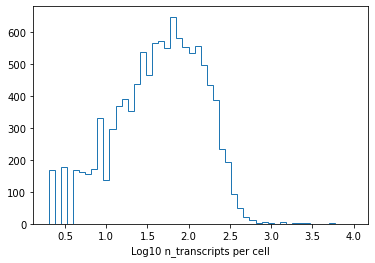

In [17]:
plt.hist(np.log10(np.array([j for i,j in Counter(transcripts.cell_id).items()])+1),bins=50,histtype='step')
plt.xlabel('Log10 n_transcripts per cell')
plt.show()

In [9]:
np.unique(transcripts.cell_id).shape

(10862,)

In [8]:
from MERFISH_Objects.Daemons import *
fname_path = '/scratch/daemon/dataset/input/SL140_2022Feb05.pkl'
data = pickle.load(open(fname_path,'rb'))
print(data)
class_verbose = True
level = data['level']
if 'verbose' in data.keys():
    verbose = data['verbose']
else:
    verbose = False
if level == 'dataset':
    data_object = Dataset_Class(data['metadata_path'],
                                data['dataset'],
                                data['cword_config'],
                                verbose=class_verbose)
elif level == 'position':
    data_object = Position_Class(data['metadata_path'],
                                 data['dataset'],
                                 data['posname'],
                                 data['cword_config'],
                                 verbose=class_verbose)
elif level == 'hybe':
    data_object = Hybe_Class(data['metadata_path'],
                             data['dataset'],
                             data['posname'],
                             data['hybe'],
                             data['cword_config'],
                             verbose=class_verbose)
elif level == 'registration':
    data_object = Registration_Class(data['metadata_path'],
                                     data['dataset'],
                                     data['posname'],
                                     data['hybe'],
                                     data['cword_config'],
                                     verbose=class_verbose)
elif level == 'stack':
    data_object = Stack_Class(data['metadata_path'],
                              data['dataset'],
                              data['posname'],
                              data['hybe'],
                              data['channel'],
                              data['cword_config'],
                              verbose=class_verbose)
elif level == 'deconvolution':
    data_object = Deconvolution_Class(data['metadata_path'],
                                      data['dataset'],
                                      data['posname'],
                                      data['hybe'],
                                      data['channel'],
                                      data['cword_config'],
                                      verbose=class_verbose)
elif level == 'image':
    data_object = Image_Class(data['metadata_path'],
                              data['dataset'],
                              data['posname'],
                              data['hybe'],
                              data['channel'],
                              data['zindex'],
                              data['cword_config'],
                              verbose=class_verbose)
elif level == 'segmentation':
    data_object = Segment_Class(data['metadata_path'],
                                     data['dataset'],
                                     data['posname'],
                                     data['cword_config'],
                                     verbose=class_verbose)
elif level == 'classification':
    data_object = Classify_Class(data['metadata_path'],
                                 data['dataset'],
                                 data['posname'],
                                 data['zindex'],
                                 data['cword_config'],
                                 verbose=class_verbose)
data_object.verbose = True
data_object.run()

{'metadata_path': '/bigstore/Images2022/Gaby/Macrophage/SL140_2022Feb05/', 'dataset': 'SL140_2022Feb05', 'cword_config': 'merfish_config_BMDM_Polarization', 'level': 'dataset', 'verbose': False}


13:11:08 Checking Imaging: 0it [00:00, ?it/s]
13:11:08 Checking Hot Pixel: 0it [00:00, ?it/s]
13:11:08 Loading Metadata: 0it [00:00, ?it/s]
13:11:30 Finding Hot Pixels: 0it [00:00, ?it/s]
13:15:12 Creating Positions: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2826.24it/s]


In [35]:
import PIL
from PIL import Image
import time
start = time.time()
PIL.Image.MAX_IMAGE_PIXELS = 1000000000
im = Image.open('/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/results/bit0_stitched.tif')
type(np.array(im))
print(time.time()-start)

18.68381404876709


In [36]:
import cv2
import time
start = time.time()
im = cv2.imread('/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/results/bit0_stitched.tif',-1).astype(np.float64)
print(time.time()-start)

23.279892444610596


In [37]:
import cv2
import time
start = time.time()
im = cv2.imread('/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/results/bit0_stitched.tif',-1)
print(time.time()-start)

14.103306293487549
